<a href="https://colab.research.google.com/github/Krishan-Kumar-kk/Neural-network/blob/main/Neural_network_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing library
import pandas as pd
import numpy as np

In [3]:
#creating a input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
print('\n Input:')
print(X)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]


In [4]:
#creating output array
y=np.array([[1],[1],[0]])
print('\n Output:')
print(y)


 Output:
[[1]
 [1]
 [0]]


In [5]:
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [6]:
# derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

In [11]:
# initializing the variables
epoch=5000 # number of training iterations
lr=0.1 # learning rate
inputlayer_neurons = X.shape[1] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

In [12]:
#initilaizing the weight and bias 
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))            #wh as a weight matrix to the hidden layer
bh=np.random.uniform(size=(1,hiddenlayer_neurons))                  #bh as bias matrix to the hidden layer
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))    #wout as a weight matrix to the output layer
bout=np.random.uniform(size=(1,output_neurons))                      #bout as bias matrix to the output layer


***Neural networks work in a very similar manner. It takes several inputs, processes it through multiple neurons from multiple hidden layers, and returns the result using an output layer. This result estimation process is technically known as “Forward Propagation“.***


***`Next, we compare the result with actual output. The task is to make the output to the neural network as close to the actual (desired) output. Each of these neurons is contributing some error to the final output. How do you reduce the error?

We try to minimize the value/ weight of neurons that are contributing more to the error and this happens while traveling back to the neurons of the neural network and finding where the error lies. This process is known as **“Backward Propagation**“.`***





In [13]:
for i in range(epoch):

    #Forward Propogation
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

print ('\n Output from the model:')
print (output)



 Output from the model:
[[0.98101205]
 [0.96883651]
 [0.03720106]]


# step involve in Neural network 

Firstly look at the broad steps:

---





```
# This is formatted as code


0.) We take input and output

X as an input matrix
y as an output matrix
1.) Then we initialize weights and biases with random values (This is one-time initiation. In the next iteration, we will use updated weights, and biases). Let us define:

wh as a weight matrix to the hidden layer
bh as bias matrix to the hidden layer
wout as a weight matrix to the output layer
bout as bias matrix to the output layer
2.) Then we take matrix dot product of input and weights assigned to edges between the input and hidden layer then add biases of the hidden layer neurons to respective inputs, this is known as linear transformation:

hidden_layer_input= matrix_dot_product(X,wh) + bh

3) Perform non-linear transformation using an activation function (Sigmoid). Sigmoid will return the output as 1/(1 + exp(-x)).

hiddenlayer_activations = sigmoid(hidden_layer_input)

4.) Then perform a linear transformation on hidden layer activation (take matrix dot product with weights and add a bias of the output layer neuron) then apply an activation function (again used sigmoid, but you can use any other activation function depending upon your task) to predict the output

output_layer_input = matrix_dot_product (hiddenlayer_activations * wout ) + bout
output = sigmoid(output_layer_input)

All the above steps are known as “Forward Propagation“

5.) Compare prediction with actual output and calculate the gradient of error (Actual – Predicted). Error is the mean square loss = ((Y-t)^2)/2

E = y – output

6.) Compute the slope/ gradient of hidden and output layer neurons ( To compute the slope, we calculate the derivatives of non-linear activations x at each layer for each neuron). The gradient of sigmoid can be returned as x * (1 – x).

slope_output_layer = derivatives_sigmoid(output)
slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)

7.) Then compute change factor(delta) at the output layer, dependent on the gradient of error multiplied by the slope of output layer activation

d_output = E * slope_output_layer

8.) At this step, the error will propagate back into the network which means error at the hidden layer. For this, we will take the dot product of the output layer delta with the weight parameters of edges between the hidden and output layer (wout.T).

Error_at_hidden_layer = matrix_dot_product(d_output, wout.Transpose)

9.) Compute change factor(delta) at hidden layer, multiply the error at hidden layer with slope of hidden layer activation

d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer

10.) Then update weights at the output and hidden layer: The weights in the network can be updated from the errors calculated for training example(s).

wout = wout + matrix_dot_product(hiddenlayer_activations.Transpose, d_output)*learning_rate
wh =  wh + matrix_dot_product(X.Transpose,d_hiddenlayer)*learning_rate

learning_rate: The amount that weights are updated is controlled by a configuration parameter called the learning rate)

11.) Finally, update biases at the output and hidden layer: The biases in the network can be updated from the aggregated errors at that neuron.

bias at output_layer =bias at output_layer + sum of delta of output_layer at row-wise * learning_rate
bias at hidden_layer =bias at hidden_layer + sum of delta of output_layer at row-wise * learning_rate   
bh = bh + sum(d_hiddenlayer, axis=0) * learning_rate
bout = bout + sum(d_output, axis=0)*learning_rate

Steps from 5 to 11 are known as “Backward Propagation“

One forward and backward propagation iteration is considered as one training cycle. As I mentioned earlier, When do we train second time then update weights and biases are used for forward propagation.

Above, we have updated the weight and biases for the hidden and output layer and we have used a full batch gradient descent algorithm.
'''

# Visualization of steps for Neural Network methodology

*We will repeat the above steps and visualize the input, weights, biases, output, error matrix to understand the working methodology of Neural Network (MLP).

Note:

For good visualization images, I have rounded decimal positions at 2 or3 positions.
Yellow filled cells represent current active cell
Orange cell represents the input used to populate the values of the current cell*

Step 0: Read input and output

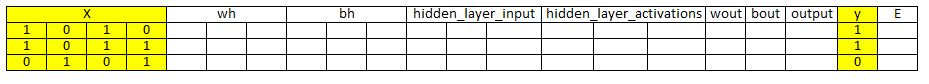

*`Step 1: Initialize weights and biases with random values (There are methods to initialize weights and biases but for now initialize with random values)`*

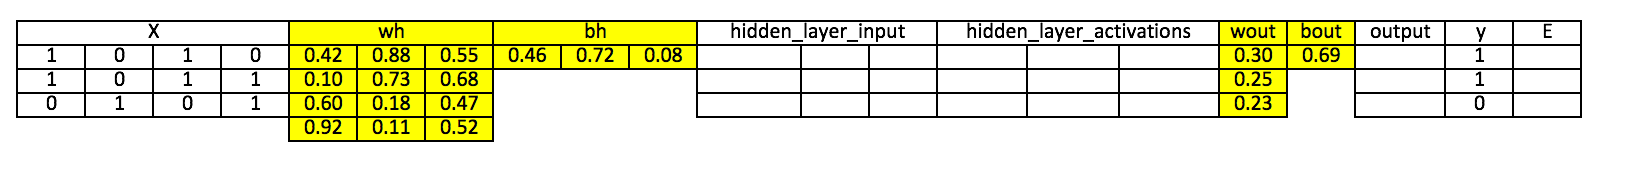

*`Step 2: Calculate hidden layer input:
hidden_layer_input= matrix_dot_product(X,wh) + bh`*

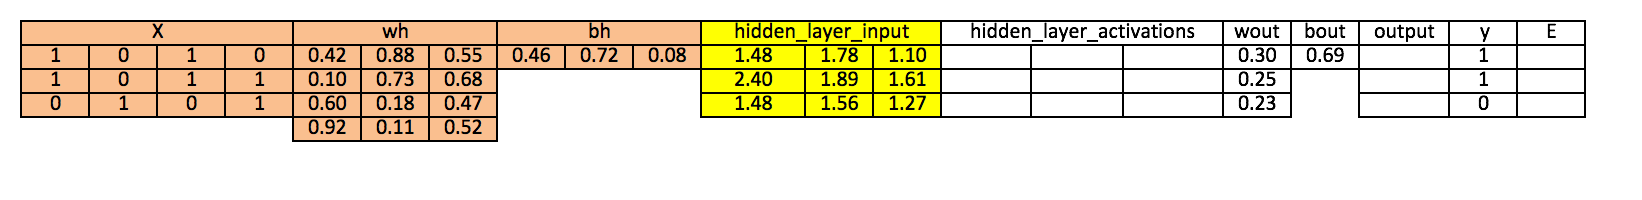

*`Step 3: Perform non-linear transformation on hidden linear input
hiddenlayer_activations = sigmoid(hidden_layer_input)`*

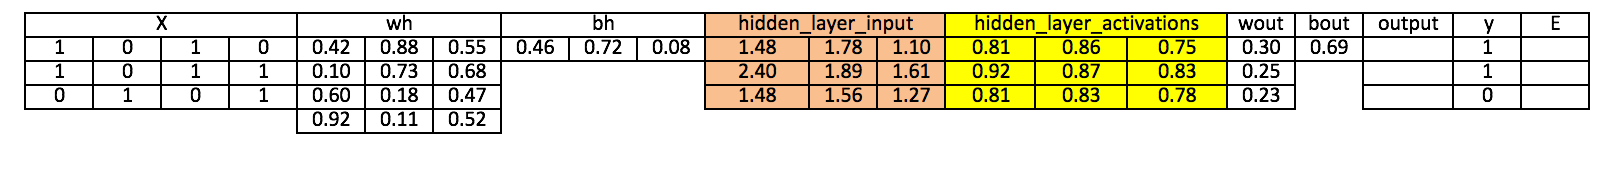


*`Step 4: Perform linear and non-linear transformation of hidden layer activation at output layer

output_layer_input = matrix_dot_product (hiddenlayer_activations * wout ) + bout
output = sigmoid(output_layer_input)`*

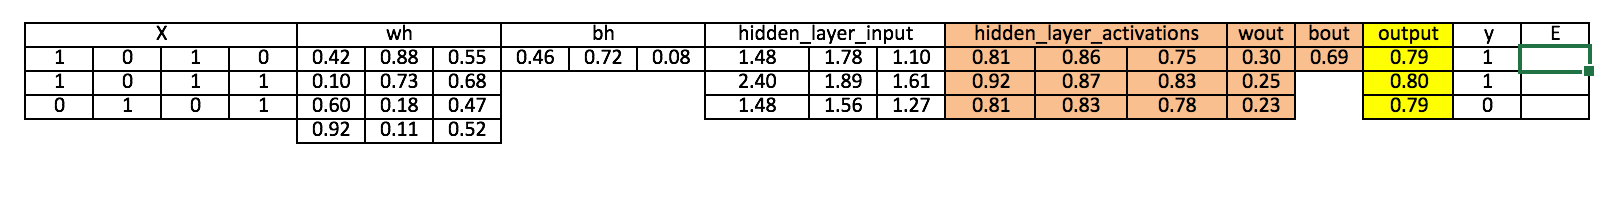

***'''Step 5: Calculate gradient of Error(E) at output layer
E = y-output'''

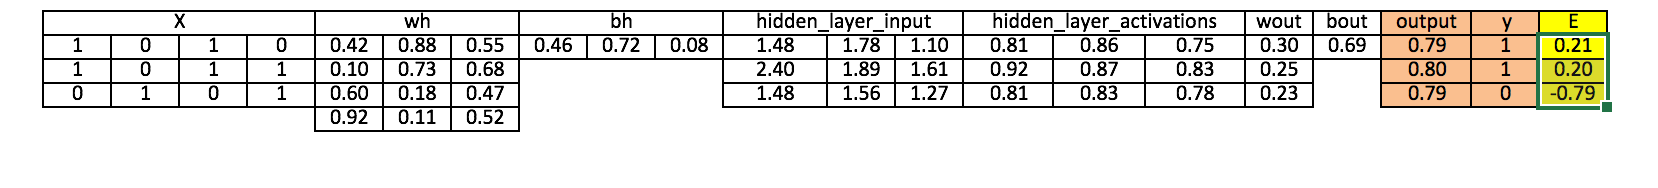


gradientStep 6: Compute slope at output and hidden layer
Slope_output_layer= derivatives_sigmoid(output)
Slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)

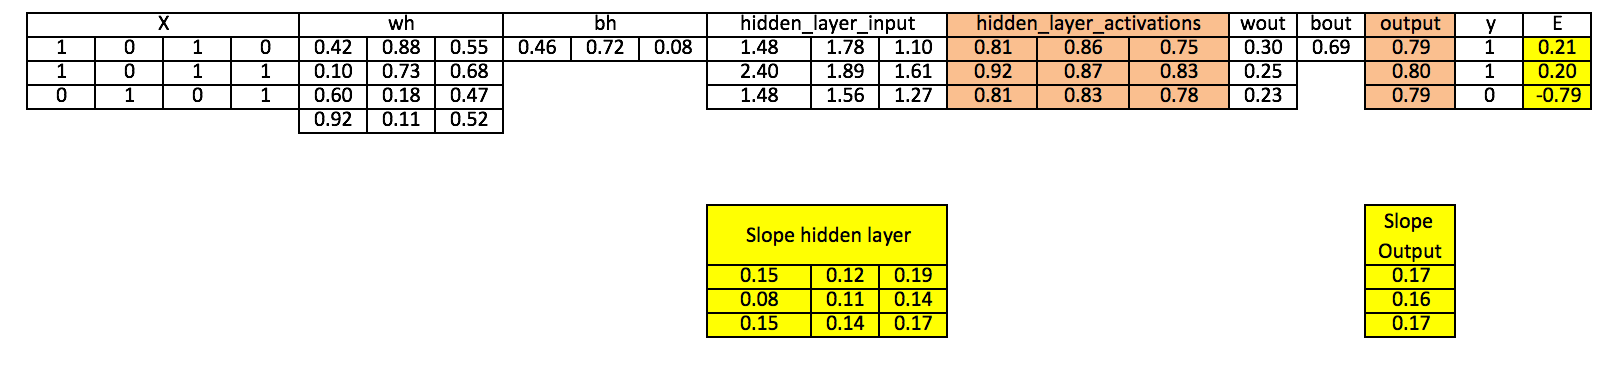

neural network, gradient slopeStep 
7: Compute delta at output layer

d_output = E * slope_output_layer*lr

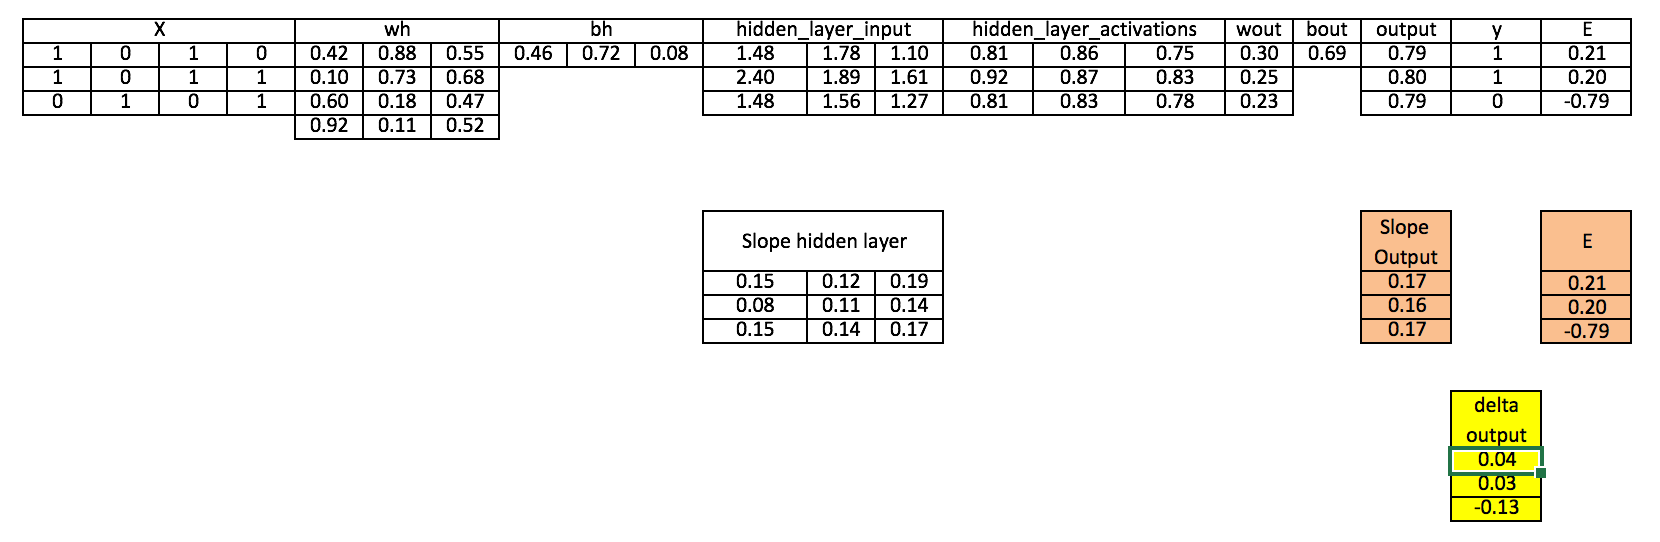

delta, neural network

Step 8: Calculate Error at the hidden layer

Error_at_hidden_layer = matrix_dot_product(d_output, wout.Transpose)

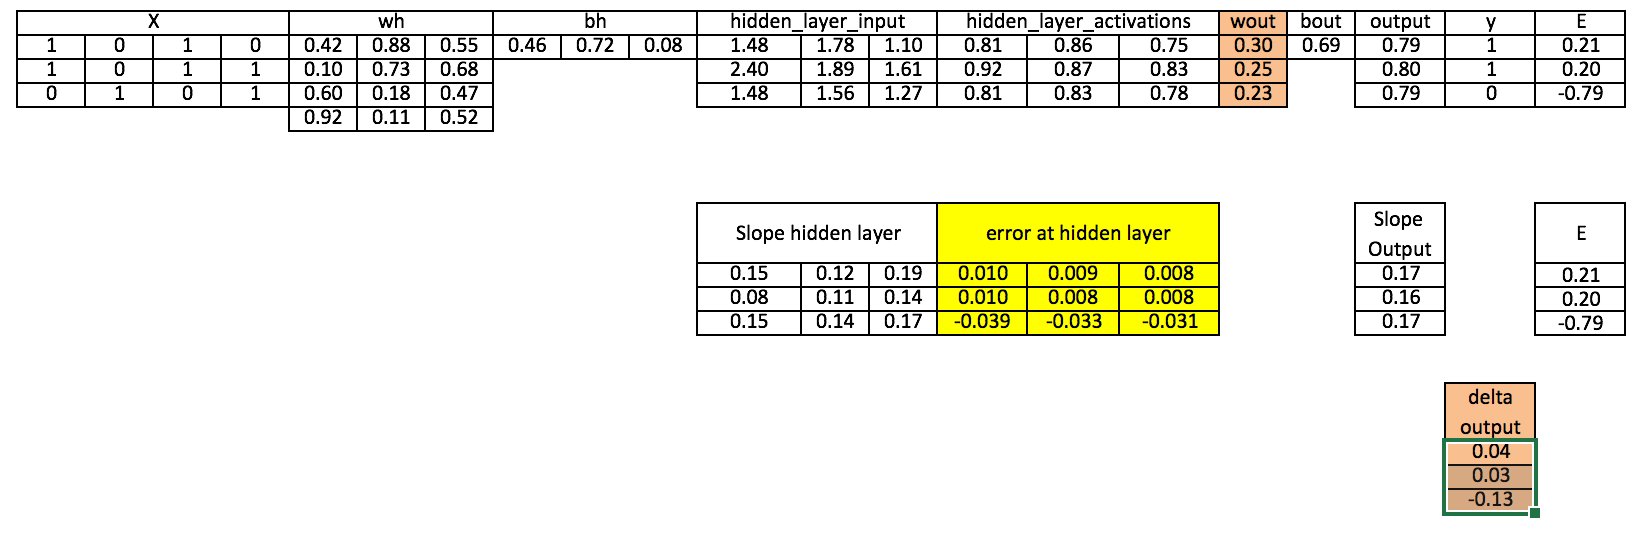


hidden layer, errorStep 9: Compute delta at hidden layer

d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer

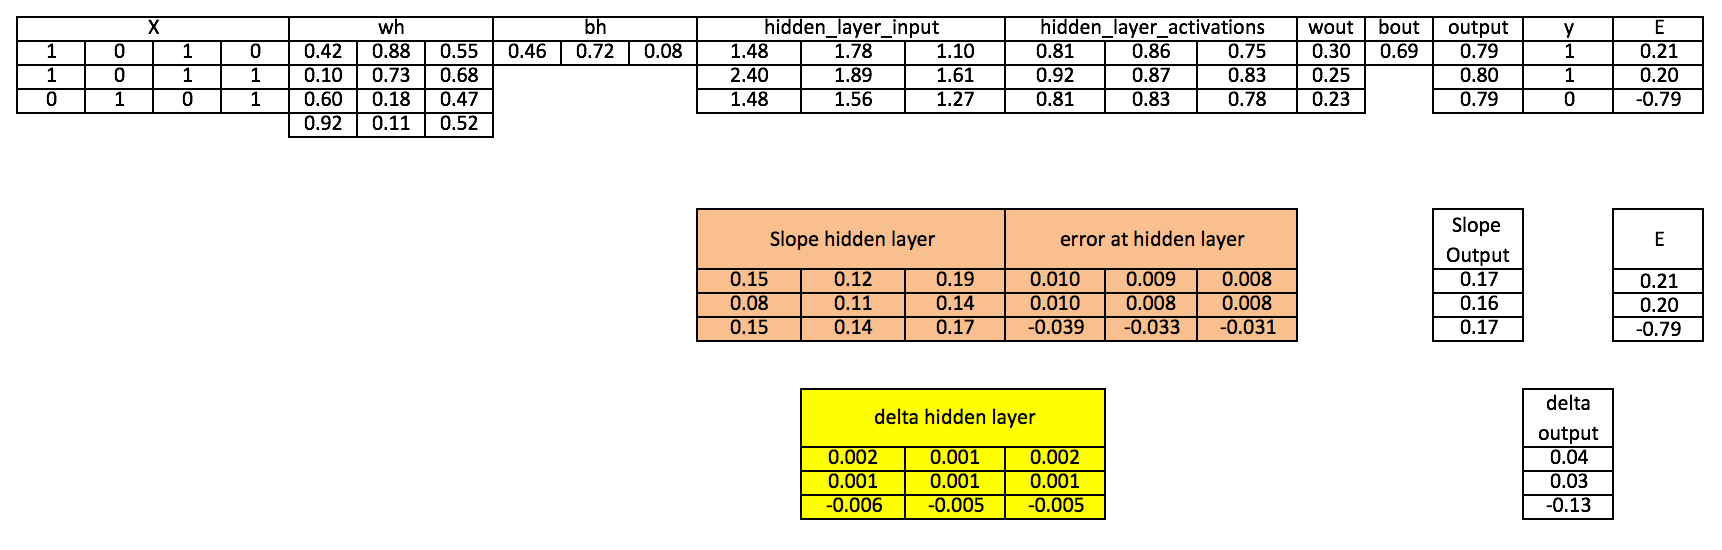

delta, hidden layer

Step 10: Update weight at both output and hidden layer

wout = wout + matrix_dot_product(hiddenlayer_activations.Transpose, d_output)*learning_rate
wh =  wh+ matrix_dot_product(X.Transpose,d_hiddenlayer)*learning_rate

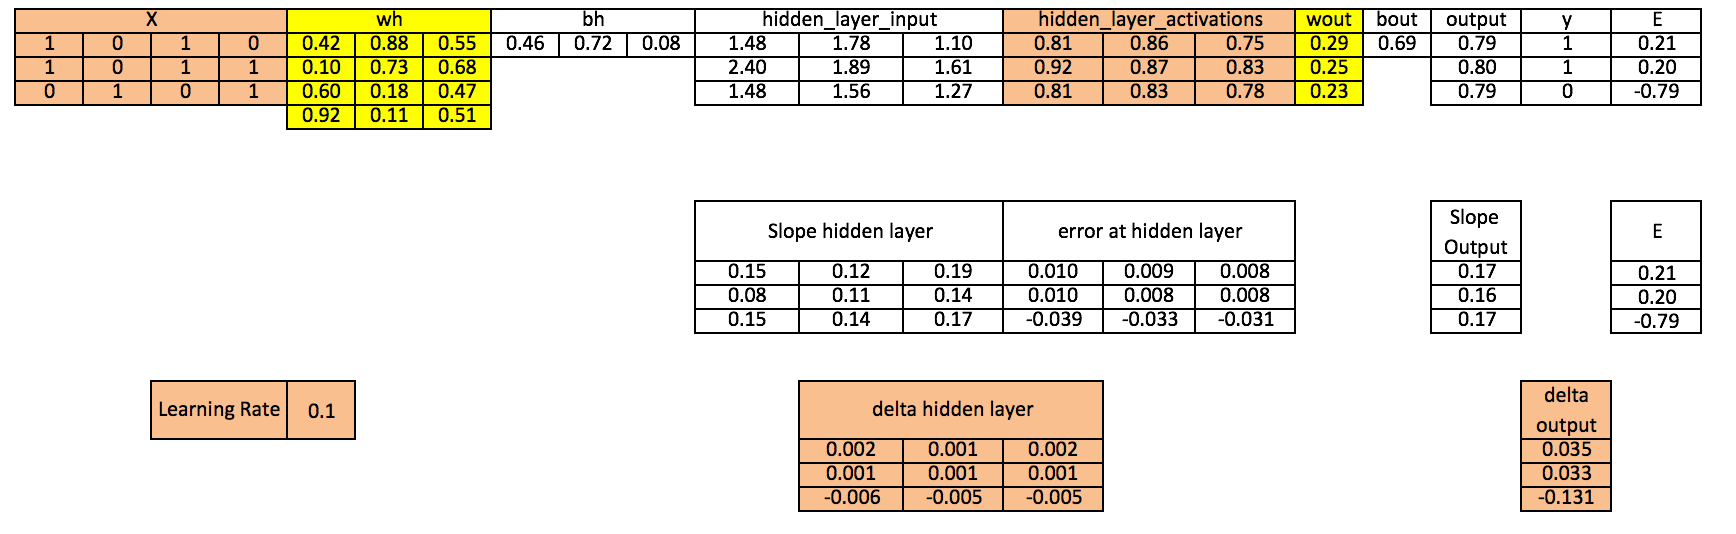

neural network, weights

Step 11: Update biases at both output and hidden layer

bh = bh + sum(d_hiddenlayer, axis=0) * learning_rate
bout = bout + sum(d_output, axis=0)*learning_rate***

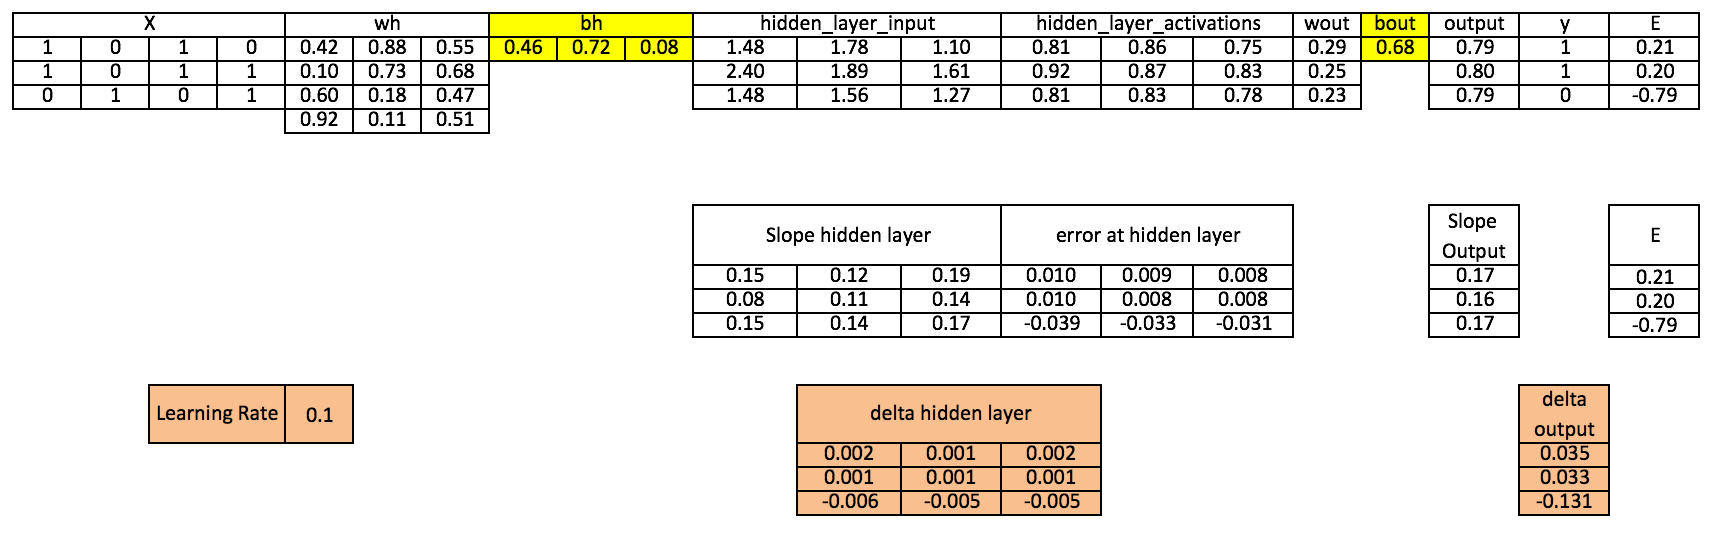